In [1]:
from pymopt.voxel import VoxelPlateModel

from scipy import stats
import numpy as np
import pandas as pa
import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import r2_score
cp = sns.color_palette(n_colors=24)

In [2]:
def radialDistance(p,w,nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr
def calc_alpha(nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    return alpha[:-1]

def lightIntensityDist(rez):
    nn = 100
    dr = 0.01
    p_result = rez["p"]
    v_result = rez["v"]
    w_result = rez["w"]

    Tt_index = np.where(v_result[2]>0)[0]
    Rd_index = np.where(v_result[2]<0)[0]

    _,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
    _,Tt = radialDistance(p_result[:,Tt_index],w_result[Tt_index],nn,dr)
    return Rd,Tt

In [70]:
grid_params={
    'thickness':[0.16,0.2,0.3],
    'g':[0.9,0.92,0.93,0.95],
    'ma':[0.01,0.1,0.5,1,2],
    'ms':[50,100,120,180,200],
}


In [3]:
nPh = 5e5
grid_params={
    'thickness':[0.16,0.2,0.3],
    'g':[0.9,0.92,0.93,0.95],
    'ma':[0.01,0.1,0.5,1,2],
    'ms':[50,100,120,180,200],
}

params = {
    'thickness':[1],
    'ms':[100],
    'ma':[1],
    'g':[0.9],
    'n':[1.37],
    'n_air':1.,
    'xy_size':10,
    'voxel_space':0.01,
}
Rd = [];Tt =[]
Rd_int = [];Tt_int =[]
g=[];ms=[];ma=[]
thickness = []

for i in ParameterGrid(grid_params):
    print(i)
    params.update(i)
    for j in ['thickness','ms','ma','g']:
        params[j] = [params[j]]
        
    model = VoxelPlateModel(nPh = nPh)
    model.build(**params)
    model = model.start()
    res = model.getRdTtValues()
    Rd.append(res['Rd'])
    Tt.append(res['Tt'])
    g.append(i['g'])
    ma.append(i['ma'])
    ms.append(i['ms'])
    thickness.append(i['thickness'])
    res_int = model.get_result()
    Rd_,Tt_ = lightIntensityDist(res_int)
    Rd_int.append(Rd_)
    Tt_int.append(Tt_)

{'g': 0.9, 'ma': 0.01, 'ms': 50, 'thickness': 0.16}
Memory area size for voxel storage: 18.072 Mbyte

###### Start ######

Progress: 0.768 [％]
Calculation time: 0 minutes 1.605 seconds.

Progress: 4.366 [％]
Calculation time: 0 minutes 3.750 seconds.

Progress: 26.657 [％]
Calculation time: 0 minutes 8.077 seconds.

Progress: 68.24 [％]
Calculation time: 0 minutes 13.274 seconds.

Progress: 90.602 [％]
Calculation time: 0 minutes 17.175 seconds.

Progress: 99.139 [％]
Calculation time: 0 minutes 19.235 seconds.

Progress: 99.991 [％]
Calculation time: 0 minutes 20.136 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 20.753 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 21.821 seconds.


###### Finish ######
Maximum step number: 823
######
Mean Rd 0.254565
Mean Tt 0.718146

Calculation time: 0 minutes 23.261 seconds.
{'g': 0.9, 'ma': 0.01, 'ms': 50, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.578 [％]
Calculation time

Progress: 1.748 [％]
Calculation time: 0 minutes 1.897 seconds.

Progress: 4.602 [％]
Calculation time: 0 minutes 4.283 seconds.

Progress: 11.178 [％]
Calculation time: 0 minutes 9.062 seconds.

Progress: 23.916 [％]
Calculation time: 0 minutes 17.453 seconds.

Progress: 48.32 [％]
Calculation time: 0 minutes 30.435 seconds.

Progress: 77.347 [％]
Calculation time: 0 minutes 45.191 seconds.

Progress: 95.658 [％]
Calculation time: 0 minutes 56.063 seconds.

Progress: 99.844 [％]
Calculation time: 1 minutes 0.581 seconds.

Progress: 99.998 [％]
Calculation time: 1 minutes 3.065 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 6.893 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 14.142 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 28.371 seconds.


###### Finish ######
Maximum step number: 8397
######
Mean Rd 0.637883
Mean Tt 0.330607

Calculation time: 1 minutes 29.097 seconds.
{'g': 0.9, 'ma': 0.01, 'ms': 180, 'thickness': 0.16}
Memory area size for voxel storag

Progress: 100.0 [％]
Calculation time: 1 minutes 51.476 seconds.

Progress: 100.0 [％]
Calculation time: 2 minutes 21.873 seconds.

Progress: 100.0 [％]
Calculation time: 3 minutes 22.490 seconds.

Progress: 100.0 [％]
Calculation time: 5 minutes 24.017 seconds.

Progress: 100.0 [％]
Calculation time: 9 minutes 28.597 seconds.


###### Finish ######
Maximum step number: 183718
######
Mean Rd 0.744314
Mean Tt 0.223952

Calculation time: 12 minutes 43.913 seconds.
{'g': 0.9, 'ma': 0.1, 'ms': 50, 'thickness': 0.16}
Memory area size for voxel storage: 18.072 Mbyte

###### Start ######

Progress: 0.773 [％]
Calculation time: 0 minutes 1.528 seconds.

Progress: 4.336 [％]
Calculation time: 0 minutes 3.836 seconds.

Progress: 26.575 [％]
Calculation time: 0 minutes 8.174 seconds.

Progress: 68.177 [％]
Calculation time: 0 minutes 13.184 seconds.

Progress: 90.51 [％]
Calculation time: 0 minutes 17.266 seconds.

Progress: 99.112 [％]
Calculation time: 0 minutes 19.428 seconds.

Progress: 99.991 [％]
Calcu

Progress: 0.537 [％]
Calculation time: 0 minutes 0.780 seconds.

Progress: 1.741 [％]
Calculation time: 0 minutes 1.971 seconds.

Progress: 4.631 [％]
Calculation time: 0 minutes 4.470 seconds.

Progress: 11.206 [％]
Calculation time: 0 minutes 9.436 seconds.

Progress: 23.886 [％]
Calculation time: 0 minutes 18.275 seconds.

Progress: 48.196 [％]
Calculation time: 0 minutes 32.074 seconds.

Progress: 77.374 [％]
Calculation time: 0 minutes 47.828 seconds.

Progress: 95.661 [％]
Calculation time: 0 minutes 59.357 seconds.

Progress: 99.838 [％]
Calculation time: 1 minutes 4.285 seconds.

Progress: 99.999 [％]
Calculation time: 1 minutes 6.876 seconds.


###### Finish ######
Maximum step number: 1961
######
Mean Rd 0.604296
Mean Tt 0.303961

Calculation time: 1 minutes 10.392 seconds.
{'g': 0.9, 'ma': 0.1, 'ms': 180, 'thickness': 0.16}
Memory area size for voxel storage: 18.072 Mbyte

###### Start ######

Progress: 0.549 [％]
Calculation time: 0 minutes 0.628 seconds.

Progress: 1.758 [％]
Calculat

Progress: 100.0 [％]
Calculation time: 0 minutes 21.129 seconds.


###### Finish ######
Maximum step number: 325
######
Mean Rd 0.212936
Mean Tt 0.631845

Calculation time: 0 minutes 21.420 seconds.
{'g': 0.9, 'ma': 0.5, 'ms': 50, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.578 [％]
Calculation time: 0 minutes 1.539 seconds.

Progress: 2.294 [％]
Calculation time: 0 minutes 3.825 seconds.

Progress: 13.0 [％]
Calculation time: 0 minutes 8.536 seconds.

Progress: 52.21 [％]
Calculation time: 0 minutes 15.424 seconds.

Progress: 82.598 [％]
Calculation time: 0 minutes 21.635 seconds.

Progress: 97.468 [％]
Calculation time: 0 minutes 25.573 seconds.

Progress: 99.944 [％]
Calculation time: 0 minutes 27.125 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 27.858 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 28.917 seconds.


###### Finish ######
Maximum step number: 531
######
Mean Rd 0.246770
Mean Tt 0.560682

Calculat

Progress: 100.0 [％]
Calculation time: 0 minutes 42.458 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 46.487 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 54.393 seconds.


###### Finish ######
Maximum step number: 4142
######
Mean Rd 0.503761
Mean Tt 0.310237

Calculation time: 0 minutes 54.573 seconds.
{'g': 0.9, 'ma': 0.5, 'ms': 180, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.538 [％]
Calculation time: 0 minutes 0.695 seconds.

Progress: 1.756 [％]
Calculation time: 0 minutes 1.629 seconds.

Progress: 4.657 [％]
Calculation time: 0 minutes 3.631 seconds.

Progress: 11.25 [％]
Calculation time: 0 minutes 7.523 seconds.

Progress: 23.855 [％]
Calculation time: 0 minutes 14.537 seconds.

Progress: 48.059 [％]
Calculation time: 0 minutes 25.311 seconds.

Progress: 77.187 [％]
Calculation time: 0 minutes 37.514 seconds.

Progress: 95.643 [％]
Calculation time: 0 minutes 46.645 seconds.

Progress: 99.836 [％]
Calculat

Progress: 100.0 [％]
Calculation time: 0 minutes 30.626 seconds.


###### Finish ######
Maximum step number: 924
######
Mean Rd 0.313209
Mean Tt 0.392290

Calculation time: 0 minutes 32.328 seconds.
{'g': 0.9, 'ma': 1, 'ms': 100, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.53 [％]
Calculation time: 0 minutes 0.888 seconds.

Progress: 1.73 [％]
Calculation time: 0 minutes 2.240 seconds.

Progress: 4.62 [％]
Calculation time: 0 minutes 5.077 seconds.

Progress: 12.738 [％]
Calculation time: 0 minutes 10.626 seconds.

Progress: 42.871 [％]
Calculation time: 0 minutes 19.478 seconds.

Progress: 76.937 [％]
Calculation time: 0 minutes 28.891 seconds.

Progress: 96.22 [％]
Calculation time: 0 minutes 35.121 seconds.

Progress: 99.894 [％]
Calculation time: 0 minutes 37.645 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 38.949 seconds.


###### Finish ######
Maximum step number: 924
######
Mean Rd 0.337166
Mean Tt 0.310802

Calculatio

Progress: 0.524 [％]
Calculation time: 0 minutes 0.589 seconds.

Progress: 1.742 [％]
Calculation time: 0 minutes 1.460 seconds.

Progress: 4.619 [％]
Calculation time: 0 minutes 3.363 seconds.

Progress: 11.223 [％]
Calculation time: 0 minutes 7.049 seconds.

Progress: 23.615 [％]
Calculation time: 0 minutes 13.628 seconds.

Progress: 44.504 [％]
Calculation time: 0 minutes 24.203 seconds.

Progress: 72.548 [％]
Calculation time: 0 minutes 37.131 seconds.

Progress: 93.235 [％]
Calculation time: 0 minutes 47.964 seconds.

Progress: 99.598 [％]
Calculation time: 0 minutes 53.343 seconds.

Progress: 99.996 [％]
Calculation time: 0 minutes 56.095 seconds.


###### Finish ######
Maximum step number: 1842
######
Mean Rd 0.478054
Mean Tt 0.167035

Calculation time: 0 minutes 59.659 seconds.
{'g': 0.9, 'ma': 1, 'ms': 200, 'thickness': 0.3}
Memory area size for voxel storage: 32.128 Mbyte

###### Start ######

Progress: 0.536 [％]
Calculation time: 0 minutes 0.616 seconds.

Progress: 1.763 [％]
Calculati

Progress: 1.741 [％]
Calculation time: 0 minutes 1.977 seconds.

Progress: 4.573 [％]
Calculation time: 0 minutes 4.460 seconds.

Progress: 11.068 [％]
Calculation time: 0 minutes 9.410 seconds.

Progress: 23.562 [％]
Calculation time: 0 minutes 18.161 seconds.

Progress: 47.47 [％]
Calculation time: 0 minutes 31.831 seconds.

Progress: 76.611 [％]
Calculation time: 0 minutes 47.552 seconds.

Progress: 95.339 [％]
Calculation time: 0 minutes 59.737 seconds.

Progress: 99.806 [％]
Calculation time: 1 minutes 4.815 seconds.


###### Finish ######
Maximum step number: 835
######
Mean Rd 0.289878
Mean Tt 0.073091

Calculation time: 1 minutes 6.362 seconds.
{'g': 0.9, 'ma': 2, 'ms': 180, 'thickness': 0.16}
Memory area size for voxel storage: 18.072 Mbyte

###### Start ######

Progress: 0.549 [％]
Calculation time: 0 minutes 0.634 seconds.

Progress: 1.745 [％]
Calculation time: 0 minutes 1.565 seconds.

Progress: 4.613 [％]
Calculation time: 0 minutes 3.563 seconds.

Progress: 11.157 [％]
Calculation t

Progress: 100.0 [％]
Calculation time: 0 minutes 46.390 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 50.777 seconds.


###### Finish ######
Maximum step number: 2168
######
Mean Rd 0.351247
Mean Tt 0.618311

Calculation time: 0 minutes 51.294 seconds.
{'g': 0.92, 'ma': 0.01, 'ms': 100, 'thickness': 0.16}
Memory area size for voxel storage: 18.072 Mbyte

###### Start ######

Progress: 0.426 [％]
Calculation time: 0 minutes 0.909 seconds.

Progress: 1.387 [％]
Calculation time: 0 minutes 2.225 seconds.

Progress: 3.871 [％]
Calculation time: 0 minutes 5.074 seconds.

Progress: 19.947 [％]
Calculation time: 0 minutes 10.563 seconds.

Progress: 60.994 [％]
Calculation time: 0 minutes 17.621 seconds.

Progress: 88.498 [％]
Calculation time: 0 minutes 23.617 seconds.

Progress: 99.015 [％]
Calculation time: 0 minutes 26.802 seconds.

Progress: 99.989 [％]
Calculation time: 0 minutes 28.001 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 29.080 seconds.

Progress: 100.0 [％]
Calc

Progress: 100.0 [％]
Calculation time: 1 minutes 38.572 seconds.

Progress: 100.0 [％]
Calculation time: 2 minutes 40.085 seconds.

Progress: 100.0 [％]
Calculation time: 4 minutes 44.510 seconds.

Progress: 100.0 [％]
Calculation time: 8 minutes 50.337 seconds.


###### Finish ######
Maximum step number: 165347
######
Mean Rd 0.528403
Mean Tt 0.443571

Calculation time: 10 minutes 58.487 seconds.
{'g': 0.92, 'ma': 0.01, 'ms': 180, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.423 [％]
Calculation time: 0 minutes 0.642 seconds.

Progress: 1.364 [％]
Calculation time: 0 minutes 1.539 seconds.

Progress: 3.547 [％]
Calculation time: 0 minutes 3.507 seconds.

Progress: 8.656 [％]
Calculation time: 0 minutes 7.419 seconds.

Progress: 19.61 [％]
Calculation time: 0 minutes 14.580 seconds.

Progress: 47.589 [％]
Calculation time: 0 minutes 25.676 seconds.

Progress: 78.97 [％]
Calculation time: 0 minutes 37.523 seconds.

Progress: 96.613 [％]
Calcul

Progress: 99.961 [％]
Calculation time: 0 minutes 25.217 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 25.749 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 26.452 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 27.858 seconds.


###### Finish ######
Maximum step number: 1928
######
Mean Rd 0.243035
Mean Tt 0.697036

Calculation time: 0 minutes 30.400 seconds.
{'g': 0.92, 'ma': 0.1, 'ms': 50, 'thickness': 0.3}
Memory area size for voxel storage: 32.128 Mbyte

###### Start ######

Progress: 0.422 [％]
Calculation time: 0 minutes 1.520 seconds.

Progress: 1.367 [％]
Calculation time: 0 minutes 3.755 seconds.

Progress: 4.166 [％]
Calculation time: 0 minutes 8.478 seconds.

Progress: 24.044 [％]
Calculation time: 0 minutes 17.409 seconds.

Progress: 64.883 [％]
Calculation time: 0 minutes 28.123 seconds.

Progress: 90.489 [％]
Calculation time: 0 minutes 36.829 seconds.

Progress: 99.309 [％]
Calculation time: 0 minutes 41.058 seconds.

Progress: 99.996 [％]
Calcul

Progress: 100.0 [％]
Calculation time: 0 minutes 54.072 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 10.864 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 44.541 seconds.


###### Finish ######
Maximum step number: 16539
######
Mean Rd 0.512863
Mean Tt 0.427185

Calculation time: 1 minutes 45.188 seconds.
{'g': 0.92, 'ma': 0.1, 'ms': 180, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.427 [％]
Calculation time: 0 minutes 0.640 seconds.

Progress: 1.372 [％]
Calculation time: 0 minutes 1.569 seconds.

Progress: 3.556 [％]
Calculation time: 0 minutes 3.531 seconds.

Progress: 8.69 [％]
Calculation time: 0 minutes 7.383 seconds.

Progress: 19.728 [％]
Calculation time: 0 minutes 14.570 seconds.

Progress: 47.765 [％]
Calculation time: 0 minutes 25.690 seconds.

Progress: 78.954 [％]
Calculation time: 0 minutes 37.583 seconds.

Progress: 96.6 [％]
Calculation time: 0 minutes 45.829 seconds.

Progress: 99.904 [％]
Calculati

Progress: 0.432 [％]
Calculation time: 0 minutes 0.895 seconds.

Progress: 1.353 [％]
Calculation time: 0 minutes 2.218 seconds.

Progress: 3.841 [％]
Calculation time: 0 minutes 5.043 seconds.

Progress: 19.56 [％]
Calculation time: 0 minutes 10.556 seconds.

Progress: 60.468 [％]
Calculation time: 0 minutes 17.601 seconds.

Progress: 88.302 [％]
Calculation time: 0 minutes 23.592 seconds.

Progress: 98.955 [％]
Calculation time: 0 minutes 26.796 seconds.

Progress: 99.99 [％]
Calculation time: 0 minutes 28.008 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 28.853 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 30.297 seconds.


###### Finish ######
Maximum step number: 1842
######
Mean Rd 0.311207
Mean Tt 0.518117

Calculation time: 0 minutes 32.601 seconds.
{'g': 0.92, 'ma': 0.5, 'ms': 100, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.41 [％]
Calculation time: 0 minutes 0.922 seconds.

Progress: 1.347 [％]
Calculatio

Progress: 99.999 [％]
Calculation time: 1 minutes 23.680 seconds.


###### Finish ######
Maximum step number: 3312
######
Mean Rd 0.528455
Mean Tt 0.178078

Calculation time: 1 minutes 29.049 seconds.
{'g': 0.92, 'ma': 0.5, 'ms': 200, 'thickness': 0.16}
Memory area size for voxel storage: 18.072 Mbyte

###### Start ######

Progress: 0.416 [％]
Calculation time: 0 minutes 0.606 seconds.

Progress: 1.373 [％]
Calculation time: 0 minutes 1.461 seconds.

Progress: 3.543 [％]
Calculation time: 0 minutes 3.325 seconds.

Progress: 8.635 [％]
Calculation time: 0 minutes 7.075 seconds.

Progress: 21.152 [％]
Calculation time: 0 minutes 14.039 seconds.

Progress: 53.556 [％]
Calculation time: 0 minutes 23.970 seconds.

Progress: 83.966 [％]
Calculation time: 0 minutes 33.593 seconds.

Progress: 98.092 [％]
Calculation time: 0 minutes 39.525 seconds.

Progress: 99.968 [％]
Calculation time: 0 minutes 41.831 seconds.

Progress: 99.999 [％]
Calculation time: 0 minutes 44.062 seconds.

Progress: 100.0 [％]
Calc

Progress: 1.359 [％]
Calculation time: 0 minutes 1.997 seconds.

Progress: 3.558 [％]
Calculation time: 0 minutes 4.497 seconds.

Progress: 11.793 [％]
Calculation time: 0 minutes 9.506 seconds.

Progress: 47.823 [％]
Calculation time: 0 minutes 17.115 seconds.

Progress: 80.773 [％]
Calculation time: 0 minutes 24.417 seconds.

Progress: 97.362 [％]
Calculation time: 0 minutes 29.049 seconds.

Progress: 99.953 [％]
Calculation time: 0 minutes 30.930 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 31.788 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 33.060 seconds.


###### Finish ######
Maximum step number: 1107
######
Mean Rd 0.302866
Mean Tt 0.402828

Calculation time: 0 minutes 33.265 seconds.
{'g': 0.92, 'ma': 1, 'ms': 120, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.406 [％]
Calculation time: 0 minutes 0.788 seconds.

Progress: 1.323 [％]
Calculation time: 0 minutes 1.974 seconds.

Progress: 3.503 [％]
Calculatio

Progress: 3.693 [％]
Calculation time: 0 minutes 4.422 seconds.

Progress: 25.629 [％]
Calculation time: 0 minutes 9.505 seconds.

Progress: 70.265 [％]
Calculation time: 0 minutes 15.186 seconds.

Progress: 90.857 [％]
Calculation time: 0 minutes 18.939 seconds.

Progress: 99.04 [％]
Calculation time: 0 minutes 21.087 seconds.

Progress: 99.988 [％]
Calculation time: 0 minutes 21.987 seconds.


###### Finish ######
Maximum step number: 235
######
Mean Rd 0.106720
Mean Tt 0.486736

Calculation time: 0 minutes 22.513 seconds.
{'g': 0.92, 'ma': 2, 'ms': 50, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.446 [％]
Calculation time: 0 minutes 1.491 seconds.

Progress: 1.844 [％]
Calculation time: 0 minutes 3.701 seconds.

Progress: 12.074 [％]
Calculation time: 0 minutes 8.308 seconds.

Progress: 54.609 [％]
Calculation time: 0 minutes 14.922 seconds.

Progress: 83.612 [％]
Calculation time: 0 minutes 20.715 seconds.

Progress: 97.452 [％]
Calculati

Progress: 3.539 [％]
Calculation time: 0 minutes 3.512 seconds.

Progress: 8.555 [％]
Calculation time: 0 minutes 7.545 seconds.

Progress: 19.443 [％]
Calculation time: 0 minutes 14.767 seconds.

Progress: 47.009 [％]
Calculation time: 0 minutes 26.125 seconds.

Progress: 78.441 [％]
Calculation time: 0 minutes 38.214 seconds.

Progress: 96.439 [％]
Calculation time: 0 minutes 46.654 seconds.

Progress: 99.901 [％]
Calculation time: 0 minutes 50.035 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 52.508 seconds.


###### Finish ######
Maximum step number: 1040
######
Mean Rd 0.315348
Mean Tt 0.146333

Calculation time: 0 minutes 52.582 seconds.
{'g': 0.92, 'ma': 2, 'ms': 180, 'thickness': 0.3}
Memory area size for voxel storage: 32.128 Mbyte

###### Start ######

Progress: 0.42 [％]
Calculation time: 0 minutes 0.630 seconds.

Progress: 1.334 [％]
Calculation time: 0 minutes 1.537 seconds.

Progress: 3.513 [％]
Calculation time: 0 minutes 3.561 seconds.

Progress: 8.515 [％]
Calculation


###### Finish ######
Maximum step number: 91862
######
Mean Rd 0.334510
Mean Tt 0.637915

Calculation time: 6 minutes 0.991 seconds.
{'g': 0.93, 'ma': 0.01, 'ms': 100, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.357 [％]
Calculation time: 0 minutes 0.902 seconds.

Progress: 1.149 [％]
Calculation time: 0 minutes 2.210 seconds.

Progress: 2.995 [％]
Calculation time: 0 minutes 5.023 seconds.

Progress: 10.267 [％]
Calculation time: 0 minutes 10.613 seconds.

Progress: 47.651 [％]
Calculation time: 0 minutes 19.282 seconds.

Progress: 80.553 [％]
Calculation time: 0 minutes 27.593 seconds.

Progress: 97.25 [％]
Calculation time: 0 minutes 32.897 seconds.

Progress: 99.943 [％]
Calculation time: 0 minutes 34.960 seconds.

Progress: 99.999 [％]
Calculation time: 0 minutes 36.163 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 38.120 seconds.


###### Finish ######
Maximum step number: 1358
######
Mean Rd 0.393107
Mean Tt 0.578318



Progress: 100.0 [％]
Calculation time: 1 minutes 20.262 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 53.870 seconds.

Progress: 100.0 [％]
Calculation time: 3 minutes 0.886 seconds.

Progress: 100.0 [％]
Calculation time: 5 minutes 15.233 seconds.

Progress: 100.0 [％]
Calculation time: 9 minutes 44.780 seconds.


###### Finish ######
Maximum step number: 165347
######
Mean Rd 0.551474
Mean Tt 0.419537

Calculation time: 12 minutes 5.319 seconds.
{'g': 0.93, 'ma': 0.01, 'ms': 180, 'thickness': 0.3}
Memory area size for voxel storage: 32.128 Mbyte

###### Start ######

Progress: 0.373 [％]
Calculation time: 0 minutes 0.644 seconds.

Progress: 1.176 [％]
Calculation time: 0 minutes 1.543 seconds.

Progress: 2.996 [％]
Calculation time: 0 minutes 3.517 seconds.

Progress: 7.297 [％]
Calculation time: 0 minutes 7.422 seconds.

Progress: 16.458 [％]
Calculation time: 0 minutes 14.793 seconds.

Progress: 32.585 [％]
Calculation time: 0 minutes 27.289 seconds.

Progress: 60.673 [％]
Calcula

Progress: 100.0 [％]
Calculation time: 0 minutes 42.389 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 44.609 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 48.915 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 57.633 seconds.


###### Finish ######
Maximum step number: 4598
######
Mean Rd 0.297647
Mean Tt 0.621476

Calculation time: 0 minutes 59.709 seconds.
{'g': 0.93, 'ma': 0.1, 'ms': 100, 'thickness': 0.16}
Memory area size for voxel storage: 18.072 Mbyte

###### Start ######

Progress: 0.369 [％]
Calculation time: 0 minutes 0.898 seconds.

Progress: 1.155 [％]
Calculation time: 0 minutes 2.228 seconds.

Progress: 3.349 [％]
Calculation time: 0 minutes 5.039 seconds.

Progress: 20.378 [％]
Calculation time: 0 minutes 10.554 seconds.

Progress: 63.131 [％]
Calculation time: 0 minutes 17.288 seconds.

Progress: 89.301 [％]
Calculation time: 0 minutes 22.921 seconds.

Progress: 99.086 [％]
Calculation time: 0 minutes 25.911 seconds.

Progress: 99.992 [％]
Calcu

Progress: 99.928 [％]
Calculation time: 0 minutes 49.076 seconds.

Progress: 99.999 [％]
Calculation time: 0 minutes 51.516 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 55.790 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 4.059 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 20.572 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 53.482 seconds.


###### Finish ######
Maximum step number: 16539
######
Mean Rd 0.530986
Mean Tt 0.400025

Calculation time: 1 minutes 54.124 seconds.
{'g': 0.93, 'ma': 0.1, 'ms': 180, 'thickness': 0.3}
Memory area size for voxel storage: 32.128 Mbyte

###### Start ######

Progress: 0.354 [％]
Calculation time: 0 minutes 0.638 seconds.

Progress: 1.145 [％]
Calculation time: 0 minutes 1.532 seconds.

Progress: 2.941 [％]
Calculation time: 0 minutes 3.503 seconds.

Progress: 7.285 [％]
Calculation time: 0 minutes 7.428 seconds.

Progress: 16.467 [％]
Calculation time: 0 minutes 14.708 seconds.

Progress: 32.54 [％]
Calculati

Progress: 99.99 [％]
Calculation time: 0 minutes 27.434 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 28.597 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 30.612 seconds.


###### Finish ######
Maximum step number: 1842
######
Mean Rd 0.280199
Mean Tt 0.553065

Calculation time: 0 minutes 33.827 seconds.
{'g': 0.93, 'ma': 0.5, 'ms': 100, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.35 [％]
Calculation time: 0 minutes 0.897 seconds.

Progress: 1.132 [％]
Calculation time: 0 minutes 2.234 seconds.

Progress: 2.994 [％]
Calculation time: 0 minutes 5.061 seconds.

Progress: 10.146 [％]
Calculation time: 0 minutes 10.728 seconds.

Progress: 47.303 [％]
Calculation time: 0 minutes 19.599 seconds.

Progress: 80.263 [％]
Calculation time: 0 minutes 28.006 seconds.

Progress: 97.104 [％]
Calculation time: 0 minutes 33.338 seconds.

Progress: 99.933 [％]
Calculation time: 0 minutes 35.480 seconds.

Progress: 99.999 [％]
Calcul

Progress: 7.292 [％]
Calculation time: 0 minutes 7.139 seconds.

Progress: 19.244 [％]
Calculation time: 0 minutes 14.228 seconds.

Progress: 54.241 [％]
Calculation time: 0 minutes 24.297 seconds.

Progress: 85.009 [％]
Calculation time: 0 minutes 33.649 seconds.

Progress: 98.37 [％]
Calculation time: 0 minutes 39.225 seconds.

Progress: 99.978 [％]
Calculation time: 0 minutes 41.350 seconds.

Progress: 99.999 [％]
Calculation time: 0 minutes 43.529 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 47.480 seconds.


###### Finish ######
Maximum step number: 3679
######
Mean Rd 0.443757
Mean Tt 0.373005

Calculation time: 0 minutes 53.648 seconds.
{'g': 0.93, 'ma': 0.5, 'ms': 200, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.364 [％]
Calculation time: 0 minutes 0.611 seconds.

Progress: 1.183 [％]
Calculation time: 0 minutes 1.461 seconds.

Progress: 3.02 [％]
Calculation time: 0 minutes 3.360 seconds.

Progress: 7.321 [％]
Calculat

Progress: 100.0 [％]
Calculation time: 0 minutes 32.852 seconds.


###### Finish ######
Maximum step number: 1107
######
Mean Rd 0.275031
Mean Tt 0.435992

Calculation time: 0 minutes 33.088 seconds.
{'g': 0.93, 'ma': 1, 'ms': 120, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.355 [％]
Calculation time: 0 minutes 0.805 seconds.

Progress: 1.155 [％]
Calculation time: 0 minutes 1.958 seconds.

Progress: 3.004 [％]
Calculation time: 0 minutes 4.453 seconds.

Progress: 7.715 [％]
Calculation time: 0 minutes 9.479 seconds.

Progress: 33.533 [％]
Calculation time: 0 minutes 18.379 seconds.

Progress: 70.765 [％]
Calculation time: 0 minutes 28.262 seconds.

Progress: 93.905 [％]
Calculation time: 0 minutes 35.509 seconds.

Progress: 99.722 [％]
Calculation time: 0 minutes 38.753 seconds.

Progress: 99.998 [％]
Calculation time: 0 minutes 40.260 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 42.308 seconds.


###### Finish ######
Maximum

Progress: 0.398 [％]
Calculation time: 0 minutes 1.468 seconds.

Progress: 1.703 [％]
Calculation time: 0 minutes 3.657 seconds.

Progress: 12.368 [％]
Calculation time: 0 minutes 8.212 seconds.

Progress: 57.588 [％]
Calculation time: 0 minutes 14.691 seconds.

Progress: 85.013 [％]
Calculation time: 0 minutes 19.984 seconds.

Progress: 97.593 [％]
Calculation time: 0 minutes 23.470 seconds.

Progress: 99.939 [％]
Calculation time: 0 minutes 24.942 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 25.726 seconds.


###### Finish ######
Maximum step number: 293
######
Mean Rd 0.101058
Mean Tt 0.422504

Calculation time: 0 minutes 25.914 seconds.
{'g': 0.93, 'ma': 2, 'ms': 50, 'thickness': 0.3}
Memory area size for voxel storage: 32.128 Mbyte

###### Start ######

Progress: 0.344 [％]
Calculation time: 0 minutes 1.523 seconds.

Progress: 1.153 [％]
Calculation time: 0 minutes 3.715 seconds.

Progress: 3.447 [％]
Calculation time: 0 minutes 8.364 seconds.

Progress: 22.333 [％]
Calculation 

Progress: 0.366 [％]
Calculation time: 0 minutes 0.643 seconds.

Progress: 1.172 [％]
Calculation time: 0 minutes 1.550 seconds.

Progress: 3.004 [％]
Calculation time: 0 minutes 3.756 seconds.

Progress: 7.302 [％]
Calculation time: 0 minutes 8.494 seconds.

Progress: 16.623 [％]
Calculation time: 0 minutes 17.148 seconds.

Progress: 32.454 [％]
Calculation time: 0 minutes 30.299 seconds.

Progress: 60.111 [％]
Calculation time: 0 minutes 48.156 seconds.

Progress: 86.268 [％]
Calculation time: 1 minutes 6.078 seconds.

Progress: 98.357 [％]
Calculation time: 1 minutes 17.161 seconds.

Progress: 99.997 [％]
Calculation time: 1 minutes 21.140 seconds.


###### Finish ######
Maximum step number: 1249
######
Mean Rd 0.298663
Mean Tt 0.067880

Calculation time: 1 minutes 22.073 seconds.
{'g': 0.93, 'ma': 2, 'ms': 200, 'thickness': 0.16}
Memory area size for voxel storage: 18.072 Mbyte

###### Start ######

Progress: 0.364 [％]
Calculation time: 0 minutes 0.602 seconds.

Progress: 1.177 [％]
Calculati

Progress: 89.632 [％]
Calculation time: 0 minutes 46.588 seconds.

Progress: 99.213 [％]
Calculation time: 0 minutes 52.423 seconds.

Progress: 99.994 [％]
Calculation time: 0 minutes 54.481 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 56.747 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 0.861 seconds.


###### Finish ######
Maximum step number: 3134
######
Mean Rd 0.410139
Mean Tt 0.559095

Calculation time: 1 minutes 5.119 seconds.
{'g': 0.95, 'ma': 0.01, 'ms': 120, 'thickness': 0.16}
Memory area size for voxel storage: 18.072 Mbyte

###### Start ######

Progress: 0.253 [％]
Calculation time: 0 minutes 0.787 seconds.

Progress: 0.799 [％]
Calculation time: 0 minutes 1.918 seconds.

Progress: 2.074 [％]
Calculation time: 0 minutes 4.405 seconds.

Progress: 10.977 [％]
Calculation time: 0 minutes 9.492 seconds.

Progress: 57.637 [％]
Calculation time: 0 minutes 16.521 seconds.

Progress: 85.174 [％]
Calculation time: 0 minutes 22.544 seconds.

Progress: 98.12 [％]
Calcul

Progress: 100.0 [％]
Calculation time: 1 minutes 36.820 seconds.

Progress: 100.0 [％]
Calculation time: 2 minutes 37.041 seconds.

Progress: 100.0 [％]
Calculation time: 4 minutes 38.688 seconds.

Progress: 100.0 [％]
Calculation time: 8 minutes 39.813 seconds.


###### Finish ######
Maximum step number: 183718
######
Mean Rd 0.429162
Mean Tt 0.543002

Calculation time: 11 minutes 52.986 seconds.
{'g': 0.95, 'ma': 0.01, 'ms': 200, 'thickness': 0.2}
Memory area size for voxel storage: 22.088 Mbyte

###### Start ######

Progress: 0.252 [％]
Calculation time: 0 minutes 0.596 seconds.

Progress: 0.794 [％]
Calculation time: 0 minutes 1.433 seconds.

Progress: 2.033 [％]
Calculation time: 0 minutes 3.262 seconds.

Progress: 4.876 [％]
Calculation time: 0 minutes 7.016 seconds.

Progress: 11.847 [％]
Calculation time: 0 minutes 14.233 seconds.

Progress: 43.325 [％]
Calculation time: 0 minutes 25.896 seconds.

Progress: 77.635 [％]
Calculation time: 0 minutes 37.747 seconds.

Progress: 96.46 [％]
Calcu

Progress: 100.0 [％]
Calculation time: 0 minutes 55.481 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 59.463 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 7.412 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 23.369 seconds.


###### Finish ######
Maximum step number: 9191
######
Mean Rd 0.387687
Mean Tt 0.526764

Calculation time: 1 minutes 27.228 seconds.
{'g': 0.95, 'ma': 0.1, 'ms': 120, 'thickness': 0.16}
Memory area size for voxel storage: 18.072 Mbyte

###### Start ######

Progress: 0.258 [％]
Calculation time: 0 minutes 0.795 seconds.

Progress: 0.8 [％]
Calculation time: 0 minutes 1.924 seconds.

Progress: 2.075 [％]
Calculation time: 0 minutes 4.353 seconds.

Progress: 11.029 [％]
Calculation time: 0 minutes 9.305 seconds.

Progress: 57.781 [％]
Calculation time: 0 minutes 16.198 seconds.

Progress: 85.396 [％]
Calculation time: 0 minutes 21.980 seconds.

Progress: 98.123 [％]
Calculation time: 0 minutes 25.616 seconds.

Progress: 99.966 [％]
Calculati

Progress: 0.262 [％]
Calculation time: 0 minutes 0.644 seconds.

Progress: 0.819 [％]
Calculation time: 0 minutes 1.501 seconds.

Progress: 2.015 [％]
Calculation time: 0 minutes 3.583 seconds.

Progress: 4.9 [％]
Calculation time: 0 minutes 7.382 seconds.

Progress: 11.738 [％]
Calculation time: 0 minutes 14.679 seconds.

Progress: 43.303 [％]
Calculation time: 0 minutes 26.432 seconds.

Progress: 77.561 [％]
Calculation time: 0 minutes 38.469 seconds.

Progress: 96.44 [％]
Calculation time: 0 minutes 46.549 seconds.

Progress: 99.909 [％]
Calculation time: 0 minutes 49.864 seconds.

Progress: 99.999 [％]
Calculation time: 0 minutes 52.231 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 56.397 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 4.493 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 20.681 seconds.

Progress: 100.0 [％]
Calculation time: 1 minutes 53.119 seconds.


###### Finish ######
Maximum step number: 18376
######
Mean Rd 0.471035
Mean Tt 0.461087

C

Progress: 0.25 [％]
Calculation time: 0 minutes 0.776 seconds.

Progress: 0.798 [％]
Calculation time: 0 minutes 1.890 seconds.

Progress: 2.041 [％]
Calculation time: 0 minutes 4.268 seconds.

Progress: 5.585 [％]
Calculation time: 0 minutes 9.147 seconds.

Progress: 38.262 [％]
Calculation time: 0 minutes 17.611 seconds.

Progress: 74.832 [％]
Calculation time: 0 minutes 26.018 seconds.

Progress: 95.18 [％]
Calculation time: 0 minutes 32.046 seconds.

Progress: 99.82 [％]
Calculation time: 0 minutes 34.708 seconds.

Progress: 99.999 [％]
Calculation time: 0 minutes 36.056 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 38.053 seconds.


###### Finish ######
Maximum step number: 1290
######
Mean Rd 0.283737
Mean Tt 0.515899

Calculation time: 0 minutes 39.091 seconds.
{'g': 0.95, 'ma': 0.5, 'ms': 120, 'thickness': 0.3}
Memory area size for voxel storage: 32.128 Mbyte

###### Start ######

Progress: 0.258 [％]
Calculation time: 0 minutes 0.768 seconds.

Progress: 0.798 [％]
Calculation

Progress: 0.305 [％]
Calculation time: 0 minutes 1.424 seconds.

Progress: 1.464 [％]
Calculation time: 0 minutes 3.450 seconds.

Progress: 14.466 [％]
Calculation time: 0 minutes 7.617 seconds.

Progress: 66.602 [％]
Calculation time: 0 minutes 13.110 seconds.

Progress: 89.018 [％]
Calculation time: 0 minutes 16.943 seconds.

Progress: 98.129 [％]
Calculation time: 0 minutes 19.556 seconds.

Progress: 99.945 [％]
Calculation time: 0 minutes 20.795 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 21.515 seconds.


###### Finish ######
Maximum step number: 464
######
Mean Rd 0.103791
Mean Tt 0.617424

Calculation time: 0 minutes 22.360 seconds.
{'g': 0.95, 'ma': 1, 'ms': 50, 'thickness': 0.3}
Memory area size for voxel storage: 32.128 Mbyte

###### Start ######

Progress: 0.251 [％]
Calculation time: 0 minutes 1.422 seconds.

Progress: 0.818 [％]
Calculation time: 0 minutes 3.445 seconds.

Progress: 2.799 [％]
Calculation time: 0 minutes 7.828 seconds.

Progress: 27.465 [％]
Calculation 

Progress: 99.999 [％]
Calculation time: 0 minutes 45.312 seconds.


###### Finish ######
Maximum step number: 1659
######
Mean Rd 0.314545
Mean Tt 0.334749

Calculation time: 0 minutes 47.666 seconds.
{'g': 0.95, 'ma': 1, 'ms': 180, 'thickness': 0.3}
Memory area size for voxel storage: 32.128 Mbyte

###### Start ######

Progress: 0.259 [％]
Calculation time: 0 minutes 0.599 seconds.

Progress: 0.802 [％]
Calculation time: 0 minutes 1.436 seconds.

Progress: 2.01 [％]
Calculation time: 0 minutes 3.263 seconds.

Progress: 4.875 [％]
Calculation time: 0 minutes 6.969 seconds.

Progress: 11.325 [％]
Calculation time: 0 minutes 14.129 seconds.

Progress: 27.291 [％]
Calculation time: 0 minutes 26.800 seconds.

Progress: 61.372 [％]
Calculation time: 0 minutes 43.637 seconds.

Progress: 88.818 [％]
Calculation time: 0 minutes 58.640 seconds.

Progress: 99.06 [％]
Calculation time: 1 minutes 6.566 seconds.

Progress: 99.991 [％]
Calculation time: 1 minutes 9.623 seconds.


###### Finish ######
Maximum s

Progress: 99.134 [％]
Calculation time: 0 minutes 48.724 seconds.

Progress: 99.999 [％]
Calculation time: 0 minutes 50.616 seconds.


###### Finish ######
Maximum step number: 697
######
Mean Rd 0.154098
Mean Tt 0.194483

Calculation time: 0 minutes 51.294 seconds.
{'g': 0.95, 'ma': 2, 'ms': 120, 'thickness': 0.16}
Memory area size for voxel storage: 18.072 Mbyte

###### Start ######

Progress: 0.264 [％]
Calculation time: 0 minutes 0.747 seconds.

Progress: 0.807 [％]
Calculation time: 0 minutes 1.815 seconds.

Progress: 2.049 [％]
Calculation time: 0 minutes 4.106 seconds.

Progress: 10.34 [％]
Calculation time: 0 minutes 8.737 seconds.

Progress: 56.53 [％]
Calculation time: 0 minutes 15.318 seconds.

Progress: 84.653 [％]
Calculation time: 0 minutes 20.869 seconds.

Progress: 97.987 [％]
Calculation time: 0 minutes 24.311 seconds.

Progress: 99.961 [％]
Calculation time: 0 minutes 25.747 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 26.507 seconds.


###### Finish ######
Maximum

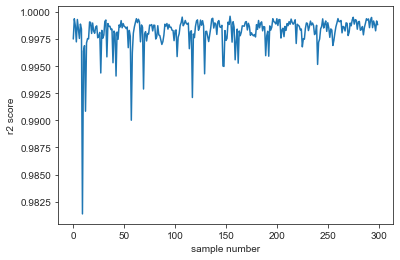

In [14]:
df = pa.DataFrame()
df['Rd'] = Rd
df['Tt'] = Tt
df['g'] = g
df['ma'] = ma
df['ms'] = ms
df['thickness'] = thickness
df['dms']=df['ms']*(1-df['g'])

alpha = calc_alpha(100,0.01)
reg_co = []
r2list = []
Rd_int = np.array(Rd_int)
y = np.log10(Rd_int[:,20:80])
x = alpha[20:80]
for i in y:
    ind = np.where((~np.isnan(i))&(i!=np.inf)&(i!=-np.inf))[0]
    x_ = x[ind]
    y_ = i[ind]
    z = np.polyfit(x_, y_, 1)
    p = np.poly1d(z)
    reg_co.append(z)
    r2list.append(r2_score(y_,p(x_)))
reg_co = np.array(reg_co).T
plt.plot(df['dms'],r2list,'.')
plt.xlabel('sample number')
plt.ylabel('r2 score')
plt.show()
df['c0'] = reg_co[0]
df['c1'] = reg_co[1]
df['r2'] = r2list

df.to_csv('si_in_inf.csv')

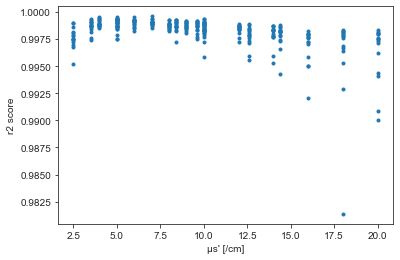

In [105]:
plt.plot(df['dms'],r2list,'.')
plt.xlabel('µs\' [/cm]')
plt.ylabel('r2 score')
plt.show()


In [73]:
(df.r2.mean(),df.r2.std())

(0.998187136688925, 0.0015636800245004362)

In [7]:
alpha = calc_alpha(100,0.01)
df_rd = pa.DataFrame(np.array(Rd_int).T)
df_rd['alpha'] = alpha
df_rd.to_csv('Rd_int.csv',index=None)
df_tt = pa.DataFrame(np.array(Tt_int).T)
df_tt['alpha'] = alpha
df_tt.to_csv('Tt_int.csv',index=None)

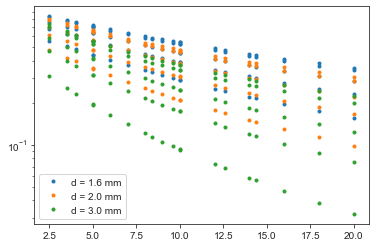

In [8]:
plt.plot(df[df['thickness']==0.16]['dms'],df[df['thickness']==0.16]['Tt'],'.',label='d = 1.6 mm')
plt.plot(df[df['thickness']==0.2]['dms'],df[df['thickness']==0.2]['Tt'],'.',label='d = 2.0 mm')
plt.plot(df[df['thickness']==0.3]['dms'],df[df['thickness']==0.3]['Tt'],'.',label='d = 3.0 mm')
plt.legend()
plt.yscale('log')
plt.show()

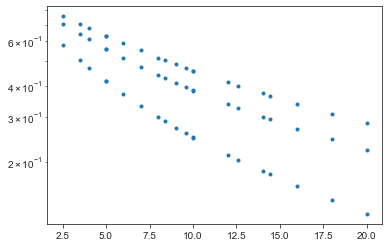

In [9]:
plt.plot(df[df['ma']==0.5]['dms'],df[df['ma']==0.5]['Tt'],'.',label='d = 1.6 mm')
plt.yscale('log')
plt.show()

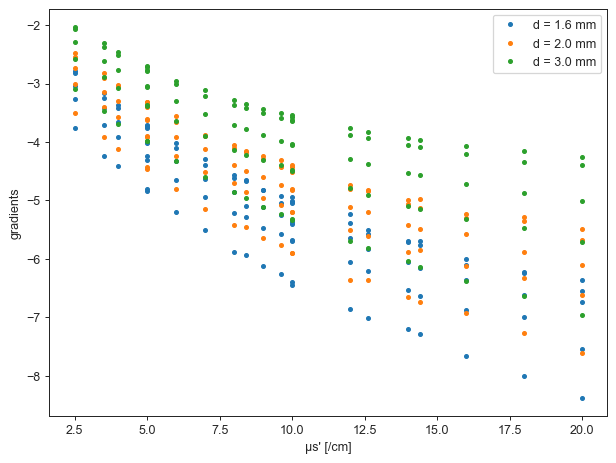

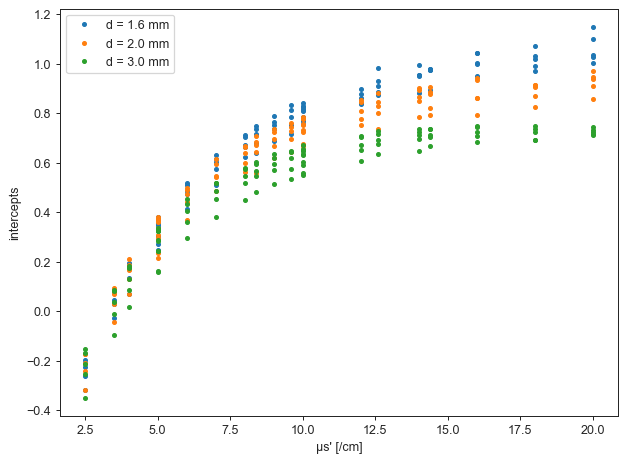

In [20]:
fig = plt.figure(figsize=(8,6),dpi = 90)
plt.plot(df[df['thickness']==0.16]['dms'],df[df['thickness']==0.16]['c0'],'.',label='d = 1.6 mm')
plt.plot(df[df['thickness']==0.2]['dms'],df[df['thickness']==0.2]['c0'],'.',label='d = 2.0 mm')
plt.plot(df[df['thickness']==0.3]['dms'],df[df['thickness']==0.3]['c0'],'.',label='d = 3.0 mm')
plt.legend()
plt.xlabel('µs\' [/cm]')
plt.ylabel('gradients')
plt.show()

fig = plt.figure(figsize=(8,6),dpi = 90)
plt.plot(df[df['thickness']==0.16]['dms'],df[df['thickness']==0.16]['c1'],'.',label='d = 1.6 mm')
plt.plot(df[df['thickness']==0.2]['dms'],df[df['thickness']==0.2]['c1'],'.',label='d = 2.0 mm')
plt.plot(df[df['thickness']==0.3]['dms'],df[df['thickness']==0.3]['c1'],'.',label='d = 3.0 mm')
plt.legend()
plt.xlabel('µs\' [/cm]')
plt.ylabel('intercepts')
plt.show()

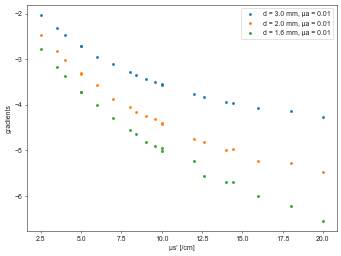

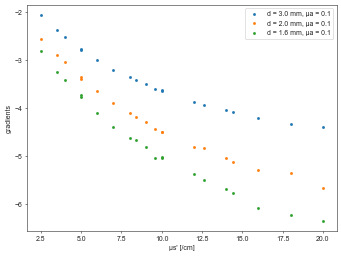

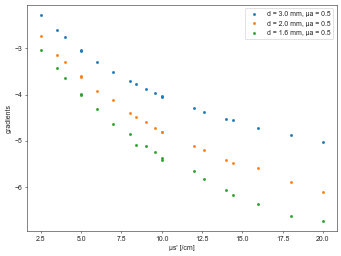

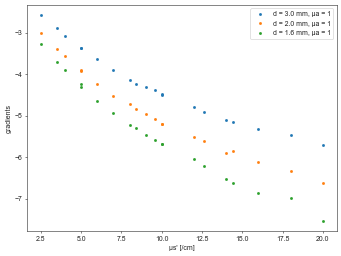

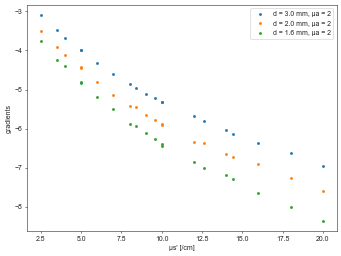

In [71]:
val_ma = grid_params['ma']
for i in val_ma:
    fig = plt.figure(figsize=(8,6),dpi = 50)
    plt.plot(df[(df['thickness']==0.3)&(df['ma']==i)]['dms'],
             df[(df['thickness']==0.3)&(df['ma']==i)]['c0'],'.',label='d = 3.0 mm, µa = '+str(i))
    plt.plot(df[(df['thickness']==0.2)&(df['ma']==i)]['dms'],
             df[(df['thickness']==0.2)&(df['ma']==i)]['c0'],'.',label='d = 2.0 mm, µa = '+str(i))
    plt.plot(df[(df['thickness']==0.16)&(df['ma']==i)]['dms'],
             df[(df['thickness']==0.16)&(df['ma']==i)]['c0'],'.',label='d = 1.6 mm, µa = '+str(i))
    plt.legend()
    plt.xlabel('µs\' [/cm]')
    plt.ylabel('gradients')
    plt.show()

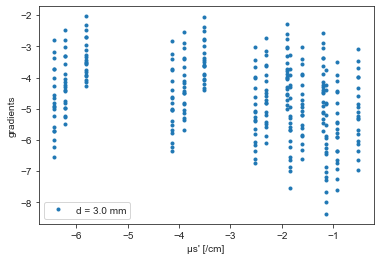

In [40]:
df['abs'] = np.log(df['ma']*df['thickness'])
plt.plot(df['abs'],df['c0'],'.',label='d = 3.0 mm')
plt.legend()
plt.xlabel('µs\' [/cm]')
plt.ylabel('gradients')
plt.show()

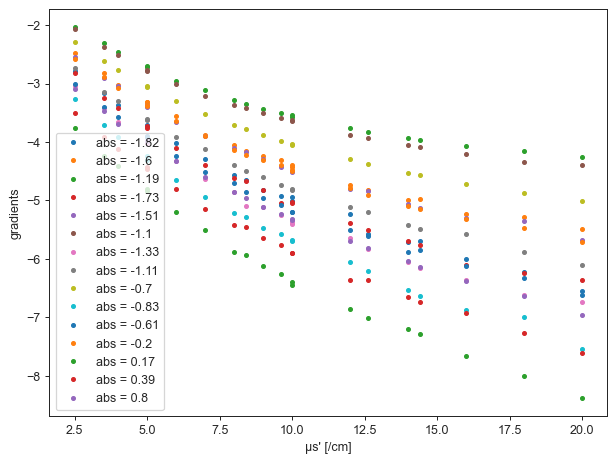

In [37]:

fig = plt.figure(figsize=(8,6),dpi = 90)
for i in df['abs'].unique():
    plt.plot(df[df['abs']==i]['dms'],df[df['abs']==i]['c0'],'.',label='abs = '+str(round(i,2)))
plt.legend()
plt.xlabel('µs\' [/cm]')
plt.ylabel('gradients')
plt.show()

In [60]:
df

,Rd,Tt,g,ma,ms,thickness,dms,c0,c1,r2,abs
0,0.254565,0.718146,0.90,0.01,50,0.16,5.0,-3.715030,0.367354,0.997511,-6.437752
1,0.306223,0.665538,0.90,0.01,50,0.20,5.0,-3.308947,0.363109,0.999375,-6.214608
2,0.409926,0.559338,0.90,0.01,50,0.30,5.0,-2.702752,0.324729,0.998731,-5.809143
3,0.428164,0.544026,0.90,0.01,100,0.16,10.0,-4.944279,0.810540,0.997242,-6.437752
4,0.489322,0.481836,0.90,0.01,100,0.20,10.0,-4.426473,0.782606,0.999307,-6.214608
...,...,...,...,...,...,...,...,...,...,...,...
295,0.231468,0.230575,0.95,2.00,180,0.20,9.0,-5.649390,0.619578,0.999168,-0.916291
296,0.242115,0.105678,0.95,2.00,180,0.30,9.0,-5.108284,0.515781,0.998846,-0.510826
297,0.238685,0.291779,0.95,2.00,200,0.16,10.0,-6.401071,0.754462,0.998265,-1.139434
298,0.249601,0.210091,0.95,2.00,200,0.20,10.0,-5.902283,0.677264,0.999171,-0.916291


In [54]:
index

array([21, 22, 23])

In [65]:
Rd_int = df_rd.drop('alpha',axis=1).values.T
Rd_int.shape

(300, 100)

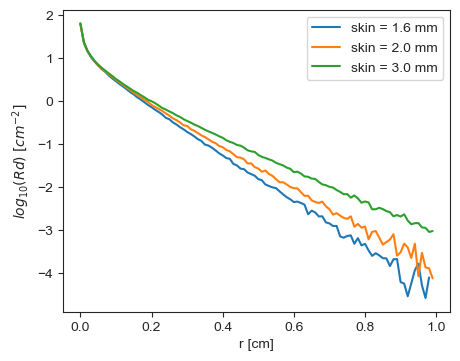

In [68]:
df_array = df.values.T
alpha = calc_alpha(100,0.01)
index = np.where((df_array[3]==0.1) & (df_array[4]==120) & (df_array[2]==0.90))[0]
plt.figure(figsize=(5,4),dpi=100)
for i in index:
    label = 'skin = '+str(df.iloc[i,5]*10)+' mm'
    plt.plot(alpha,np.log10(Rd_int[i]),label=label)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('$log_{10}(Rd)$ $[cm^{-2}]$')

plt.show()

In [76]:
Tt_int = df_tt.drop('alpha',axis=1).values.T
Tt_int.shape

(300, 100)

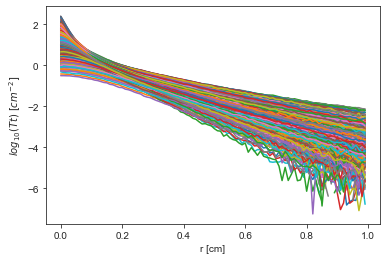

In [85]:
plt.plot(alpha,np.log10(Tt_int).T,label=label)
plt.xlabel('r [cm]')
plt.ylabel('$log_{10}(Tt)$ $[cm^{-2}]$')
plt.show()

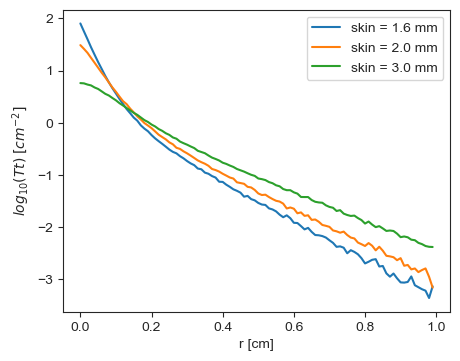

In [100]:
df_array = df.values.T
alpha = calc_alpha(100,0.01)
index = np.where((df_array[3]==0.1) & (df_array[4]==50) & (df_array[2]==0.9))[0]
plt.figure(figsize=(5,4),dpi=100)
for i in index:
    label = 'skin = '+str(df.iloc[i,5]*10)+' mm'
    plt.plot(alpha,np.log10(Tt_int[i]),label=label)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('$log_{10}(Tt)$ $[cm^{-2}]$')

plt.show()

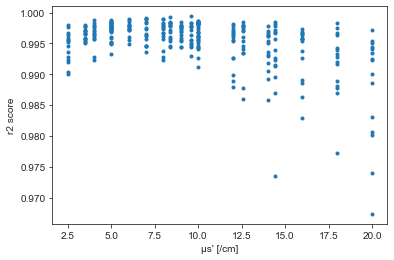

In [106]:
alpha = calc_alpha(100,0.01)
reg_co_tt = []
r2list_tt = []
y = np.log10(Tt_int[:,40:80])
x = alpha[40:80]
for i in y:
    ind = np.where((~np.isnan(i))&(i!=np.inf)&(i!=-np.inf))[0]
    x_ = x[ind]
    y_ = i[ind]
    z = np.polyfit(x_, y_, 1)
    p = np.poly1d(z)
    reg_co_tt.append(z)
    r2list_tt.append(r2_score(y_,p(x_)))
reg_co_tt = np.array(reg_co_tt).T
plt.plot(df['dms'],r2list_tt,'.')
plt.xlabel('µs\' [/cm]')
plt.ylabel('r2 score')
plt.show()
df['c0_tt'] = reg_co_tt[0]
df['c1_tt'] = reg_co_tt[1]
df['r2_tt'] = r2list_tt
df.to_csv('si_in_inf.csv')

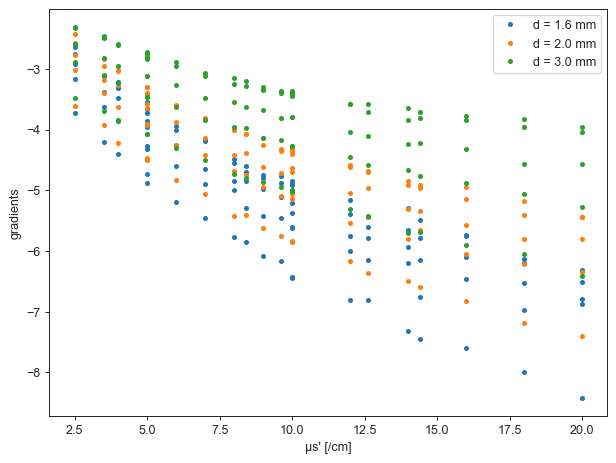

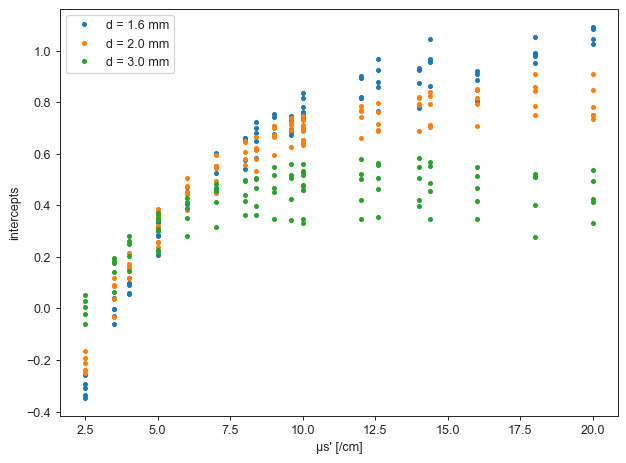

In [103]:
fig = plt.figure(figsize=(8,6),dpi = 90)
plt.plot(df[df['thickness']==0.16]['dms'],df[df['thickness']==0.16]['c0_tt'],'.',label='d = 1.6 mm')
plt.plot(df[df['thickness']==0.2]['dms'],df[df['thickness']==0.2]['c0_tt'],'.',label='d = 2.0 mm')
plt.plot(df[df['thickness']==0.3]['dms'],df[df['thickness']==0.3]['c0_tt'],'.',label='d = 3.0 mm')
plt.legend()
plt.xlabel('µs\' [/cm]')
plt.ylabel('gradients')
plt.show()

fig = plt.figure(figsize=(8,6),dpi = 90)
plt.plot(df[df['thickness']==0.16]['dms'],df[df['thickness']==0.16]['c1_tt'],'.',label='d = 1.6 mm')
plt.plot(df[df['thickness']==0.2]['dms'],df[df['thickness']==0.2]['c1_tt'],'.',label='d = 2.0 mm')
plt.plot(df[df['thickness']==0.3]['dms'],df[df['thickness']==0.3]['c1_tt'],'.',label='d = 3.0 mm')
plt.legend()
plt.xlabel('µs\' [/cm]')
plt.ylabel('intercepts')
plt.show()

In [ ]:
nPh = 1e5
params = {
    'thickness':[0.3],
    'ms':[100],
    'ma':[1],
    'g':[0.9],
    'n':[1.37],
    'n_air':1.,
    'xy_size':10,
    'voxel_space':0.1,
}
model = VoxelPlateModel(nPh = nPh)
model.build(**params)
model = model.start()

res_it = model.get_result()
res_it

nn = 100
dr = 0.01

p_result = res_it["p"]
v_result = res_it["v"]
w_result = res_it["w"]

Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

alphaRd,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
alphaTt,Tt = radialDistance(p_result[:,Tt_index],w_result[Tt_index],nn,dr)

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaRd,Rd,'-',c = 'red')
plt.yscale('log')
#plt.xlim(0,0.5)
#plt.ylim(10**-2,10**2)
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaTt,Tt,'-',c = 'blue')
plt.yscale('log')
#plt.xlim(0,0.5)
#plt.ylim(10**-2,1)
plt.xlabel('r [cm]')
plt.ylabel('Tt $[cm^{-2}]$')
plt.show()

In [ ]:
df = pa.DataFrame()
df['Rd'] = Rd
df['Tt'] = Tt
df['g'] = g
df['ma'] = ma
df['ms'] = ms

df.to_csv('si_in_inf.csv')

In [ ]:
df

In [ ]:
dms = df['ms'].values*(1-df['g'].values)
dms

In [ ]:
plt.figure(figsize=(8,6),dpi = 90)
plt.plot(dms,Tt,'.',c = 'k')
plt.yscale('log')
plt.xlabel('µs\' [/cm]')
plt.ylabel('Tt')
plt.show()

In [ ]:
plt.figure(figsize=(8,6),dpi = 90)
plt.plot(dms,Rd,'.',c = 'k')
#plt.yscale('log')
plt.xlabel('µs\' [/cm]')
plt.ylabel('Rd')
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,6),dpi = 100)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ma, dms, Tt,c = 'k')
ax.set_xlabel('µa [/cm]')
ax.set_ylabel('µs\' [/cm]')
ax.set_zlabel('Tt')

plt.show()

In [ ]:

fig = plt.figure(figsize=(8,6),dpi = 100)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ma, dms, Rd,c = 'k')
ax.set_xlabel('µa [/cm]')

ax.set_ylabel('µs\' [/cm]')
ax.set_zlabel('Rd')

plt.show()

In [ ]:
df_input = pa.DataFrame({
    "dms":dms,
    "ma":ma,
    #'delta':delta,
    'Tt':Tt,
})
df_input.dropna()

In [ ]:
import statsmodels.api as sm
df_input = pa.DataFrame({
    "dms":np.log(dms),
    "ma":(ma),
    'Tt':Tt,
})
df_input = df_input.dropna()
df_input = sm.add_constant(df_input)
y = np.log(df_input.Tt.values)
X = df_input.drop("Tt",axis=1)
#model = sm.GLM(y,X,family=sm.families.Poisson())
model = sm.OLS(y,X)
result = model.fit()
result.summary()

In [ ]:
plt.plot(y,result.predict(),'.')
plt.show()

In [ ]:
a = pa.read_csv('./test.csv')
a

In [ ]:
import scipy.optimize

def fit_exp(parameter, x, y):
    a = parameter[0]
    b = parameter[1]
    residual = y - (a * np.exp(b * x))
    return residual

def fit_exp_linear(parameter, x, y):
    a = parameter[0]
    b = parameter[1]
    residual = np.log(y) - (np.log(a) + b * x)
    return residual


In [ ]:
para1 = []
para2 = []
parameter0 = [1, 1]
for i in a.columns[1:]:
    b = a[['dms',i]].dropna()
    x = b.iloc[:,0]
    y = b.iloc[:,1]
    r1 = scipy.optimize.leastsq(fit_exp, parameter0, args=(x, y))
    r2 = scipy.optimize.leastsq(fit_exp_linear, parameter0, args=(x, y))
    para1.append(r1[0])
    para2.append(r2[0])
para1 = np.array(para1)
para2 = np.array(para2)
print(para2)
print(para1)

In [ ]:

for n,i in enumerate(a.columns[1:]):
    plt.plot(np.sort(a['dms']),para1[n,0]*np.exp(para1[n,1]*np.sort(a['dms'])),'-',color = cp[n])
    plt.plot(a['dms'],a[i],'.',color = cp[n])
plt.yscale('log')
plt.show()

In [ ]:
for n,i in enumerate(a.columns[1:]):
    plt.plot(np.sort(a['dms']),para2[n,0]*np.exp(para2[n,1]*np.sort(a['dms'])),'-',color = cp[n],label = i)
    plt.plot(a['dms'],a[i],'.',color = cp[n])
plt.yscale('log')
plt.xlabel('µs\' [/cm]')
plt.ylabel('Tt')
plt.legend()
plt.show()

In [ ]:

plt.plot([0.01,0.1,0.5,0.9786,2],para2.T[0])
plt.yscale('log')
plt.show()

plt.plot([0.01,0.1,0.5,0.9786,2],para2.T[1])
plt.show()

In [ ]:
plt.plot(a['dms'],r1[0][0]*np.exp(r1[0][1]*a['dms']),'.')
plt.plot(a['dms'],a['ma=0.1'],'.')
plt.show()
plt.plot(a['dms'],r2[0][0]*np.exp(r2[0][1]*a['dms']),'.')
plt.plot(a['dms'],a['ma=0.1'],'.')
plt.show()

In [ ]:
c = pa.read_csv('./si_in_10x10x10mm.csv')
c

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
clf = SVR(kernel = 'linear')#‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
clf = Ridge()
d = c[['dms','ma','Tt']].dropna()
y = np.log(d.Tt)
X = d.drop('Tt',axis=1)
clf.fit(X,y)
pred = clf.predict(X)


In [ ]:
plt.plot(y,pred,'.')
plt.show()

In [ ]:
grid_params={
    'g':[0.9,0.92,0.93,0.95],
    'ma':[0.5,0.9786,2],
    'ms':[127,180,200],
}
len(list(ParameterGrid(grid_params)))

In [ ]:
nPh = 3*1e5
grid_params={
    'g':[0.9,0.92,0.93,0.95],
    'ma':[0.5,0.9786,2],
    'ms':[127,180,200],
}

params = {
    'thickness':[1],
    'ms':[100],
    'ma':[1],
    'g':[0.9],
    'n':[1.375],
    'n_air':1.592,
    'xy_size':10,
    'voxel_space':1,
}
Rd_2 = [];Tt_2 =[]
g_2=[];ms_2=[];ma_2=[]
for i in ParameterGrid(grid_params):
    print(i)
    params.update(i)
    for j in ['ms','ma','g']:
        params[j] = [params[j]]
        
    model = VoxelPlateModel(nPh = nPh)
    model.build(**params)
    model = model.start()
    res = model.getRdTtValues()
    Rd_2.append(res['Rd'])
    Tt_2.append(res['Tt'])
    g_2.append(i['g'])
    ma_2.append(i['ma'])
    ms_2.append(i['ms'])

In [ ]:
df2 = pa.DataFrame()
df2['Rd'] = Rd_2
df2['Tt'] = Tt_2
df2['g'] = g_2
df2['ma'] = ma_2
df2['ms'] = ms_2

df2.to_csv('si_in_inf2.csv')

In [ ]:
dms2 = df2['ms'].values*(1-df2['g'].values)
dms2

In [ ]:
plt.figure(figsize=(8,6),dpi = 90)
plt.plot(dms2,df2.Tt,'.',c = 'k')
plt.yscale('log')
plt.xlabel('µs\' [/cm]')
plt.ylabel('Tt')
plt.show()